<h1><center>Diabetes Prediction</center></h1>

<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:violet; border:0; color:white' role="tab" aria-controls="home"><center>Quick navigation</center></h2>

* [0. Installation of libraries](#0)
* [1. Basic Data Overview](#1)
* [2. Analysis of data](#2)
* [3. EDA](#3)
* [4. Classification models](#4)

<a id="0"></a>
<h2 style='background:violet; border:0; color:white'><center>0. Installation of libraries</center><h2>

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly 
import plotly.express as px
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
pyo.init_notebook_mode()
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn import preprocessing 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set_palette("Set3")
from matplotlib import style
style.use("ggplot")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/predict-diabities/diabetes.csv


<a id="1"></a>
<h2 style='background:violet; border:0; color:white'><center>1. Basic Data Overview</center><h2>

In [18]:
df=pd.read_csv("/kaggle/input/predict-diabities/diabetes.csv")
display(df)
print(df.info())

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


<a id="2"></a>
<h2 style='background:violet; border:0; color:white'><center>2. Analysis of data</center><h2>

In [19]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

<Figure size 432x288 with 0 Axes>

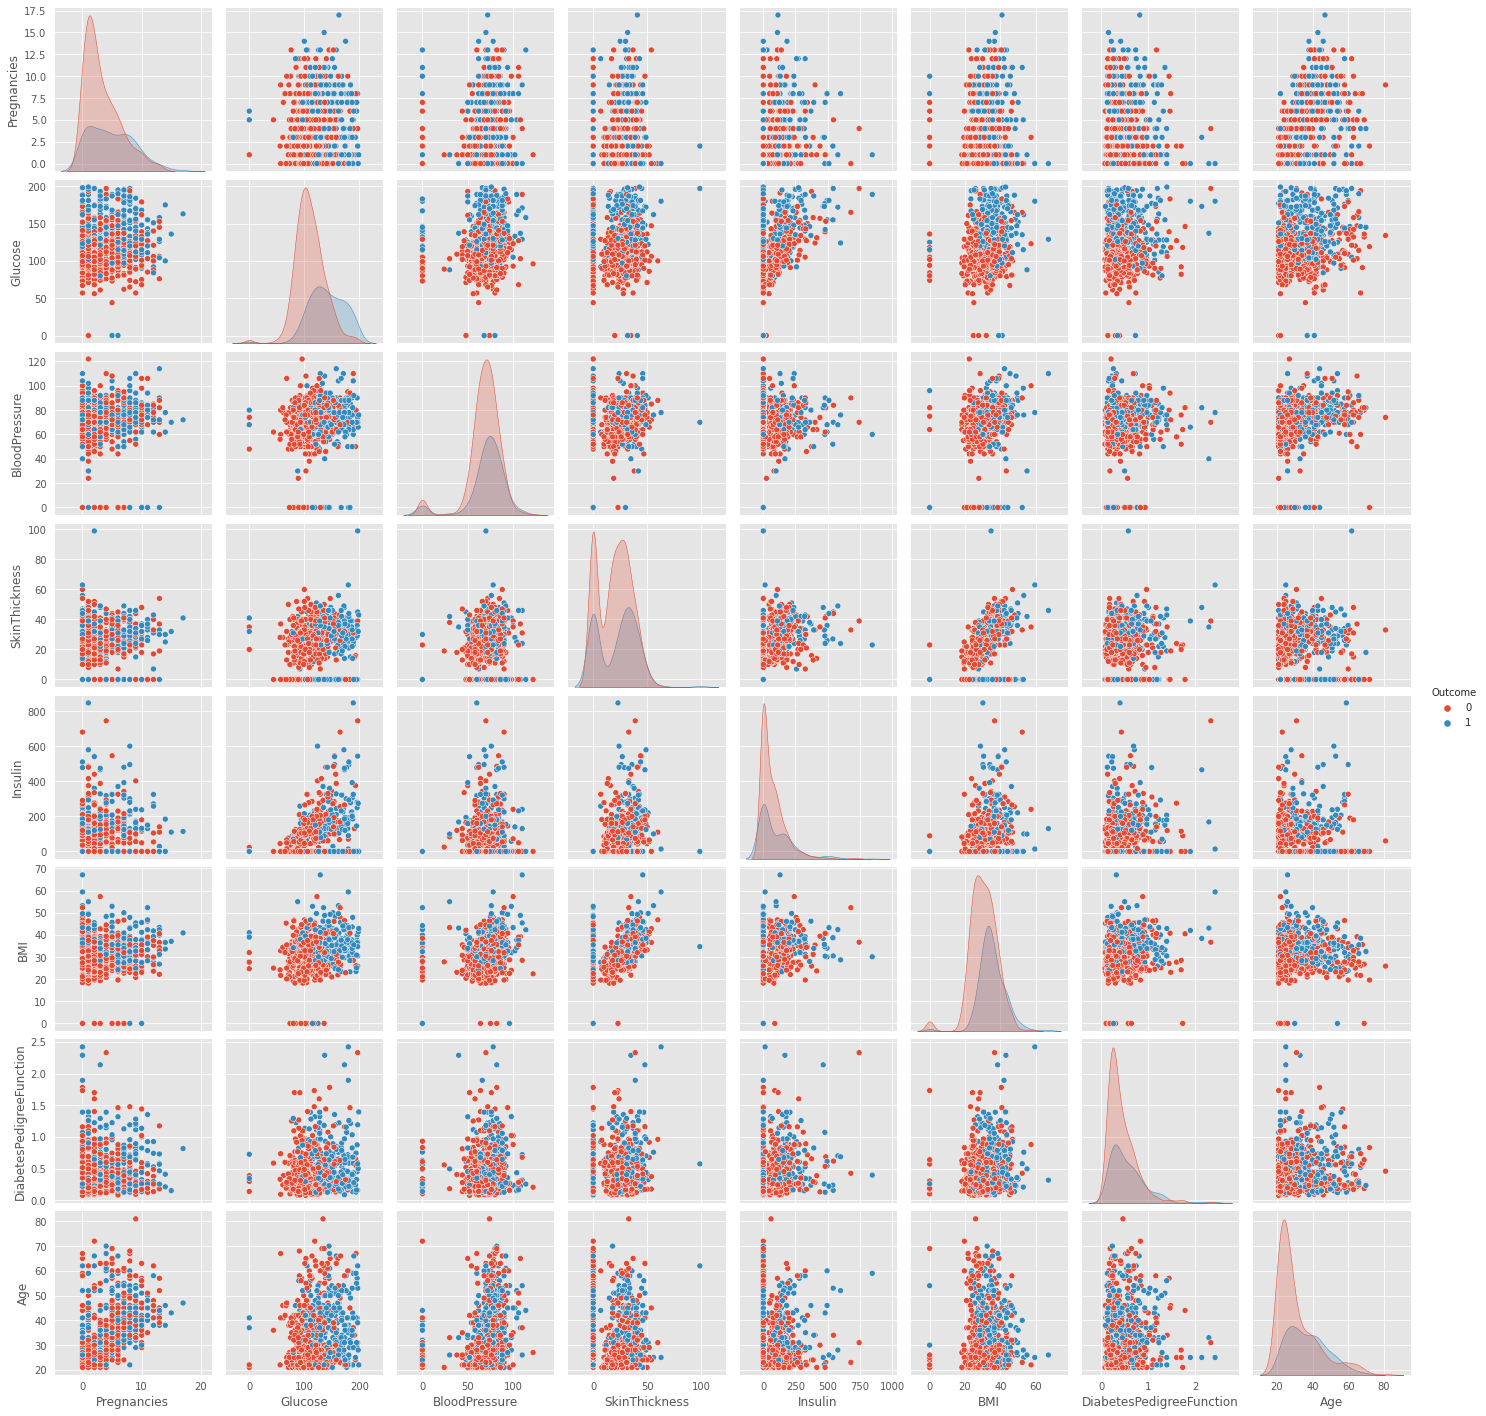

In [20]:
plt.figure()
sns.pairplot(df, hue= "Outcome")
plt.show()

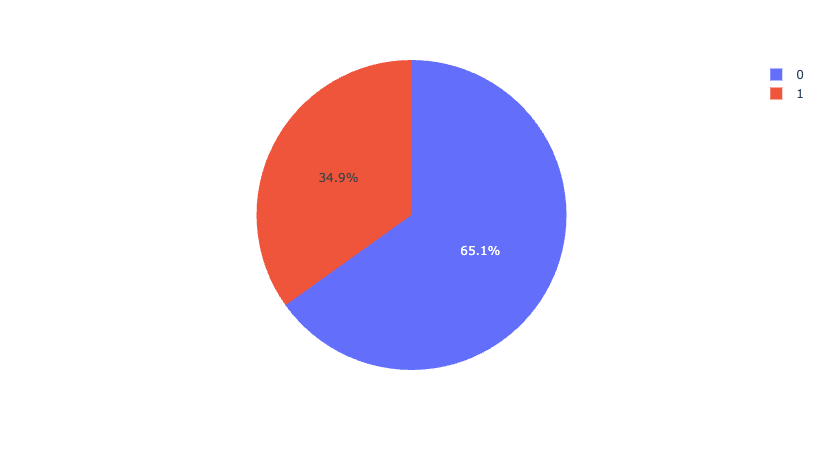

In [21]:
fig = px.pie(df,  
             names='Outcome')
fig.show()

<a id="3"></a>
<h2 style='background:violet; border:0; color:white'><center>3. EDA</center><h2>

In [22]:
# Remove NaN
a = df.isnull().mean()*100
b = a[a>0].sort_values(ascending = False)
b[b>1]

Series([], dtype: float64)

In [23]:
# Looks like 0 value - is NaN
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols] = df[cols].replace(0, float('nan'))
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      NaN  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [24]:
for col in cols:
    data = df.copy()
    test_data = data[data[col].isnull()]
    data.dropna(inplace=True)
    y_train = data[col]
    
    X_train = data.drop(cols, axis=1)
    X_test = test_data.drop(cols, axis=1)
    model = Pipeline(steps=[('scale',StandardScaler()),
                            ('lr',DecisionTreeRegressor(random_state=42))
                              ])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    for i, ni in enumerate(test_data.index[:len(df)]):
             df[col].loc[ni] = y_pred[i]

In [25]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    175.0  33.6   
1              1     85.0           66.0           29.0     76.0  26.6   
2              8    183.0           64.0           39.0    114.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0     49.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           46.0    127.0  30.1   
767            1     93.0           70.0           31.0     63.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [26]:
# Remove outliers
def outliers_removal(df, i):
    perc = np.percentile(df[i], [0, 25, 50, 75, 100])
    iqr = perc[3] - perc[1]
    _min = perc[1] - 1.5*iqr
    _max = perc[3] + 1.5*iqr
    df.loc[df[i] > _max, i] = _max
    df.loc[df[i] < _min, i] = _min
    return df

In [27]:
for i in df.columns[:-1]:
    df = outliers_removal(df, i)

<Figure size 432x288 with 0 Axes>

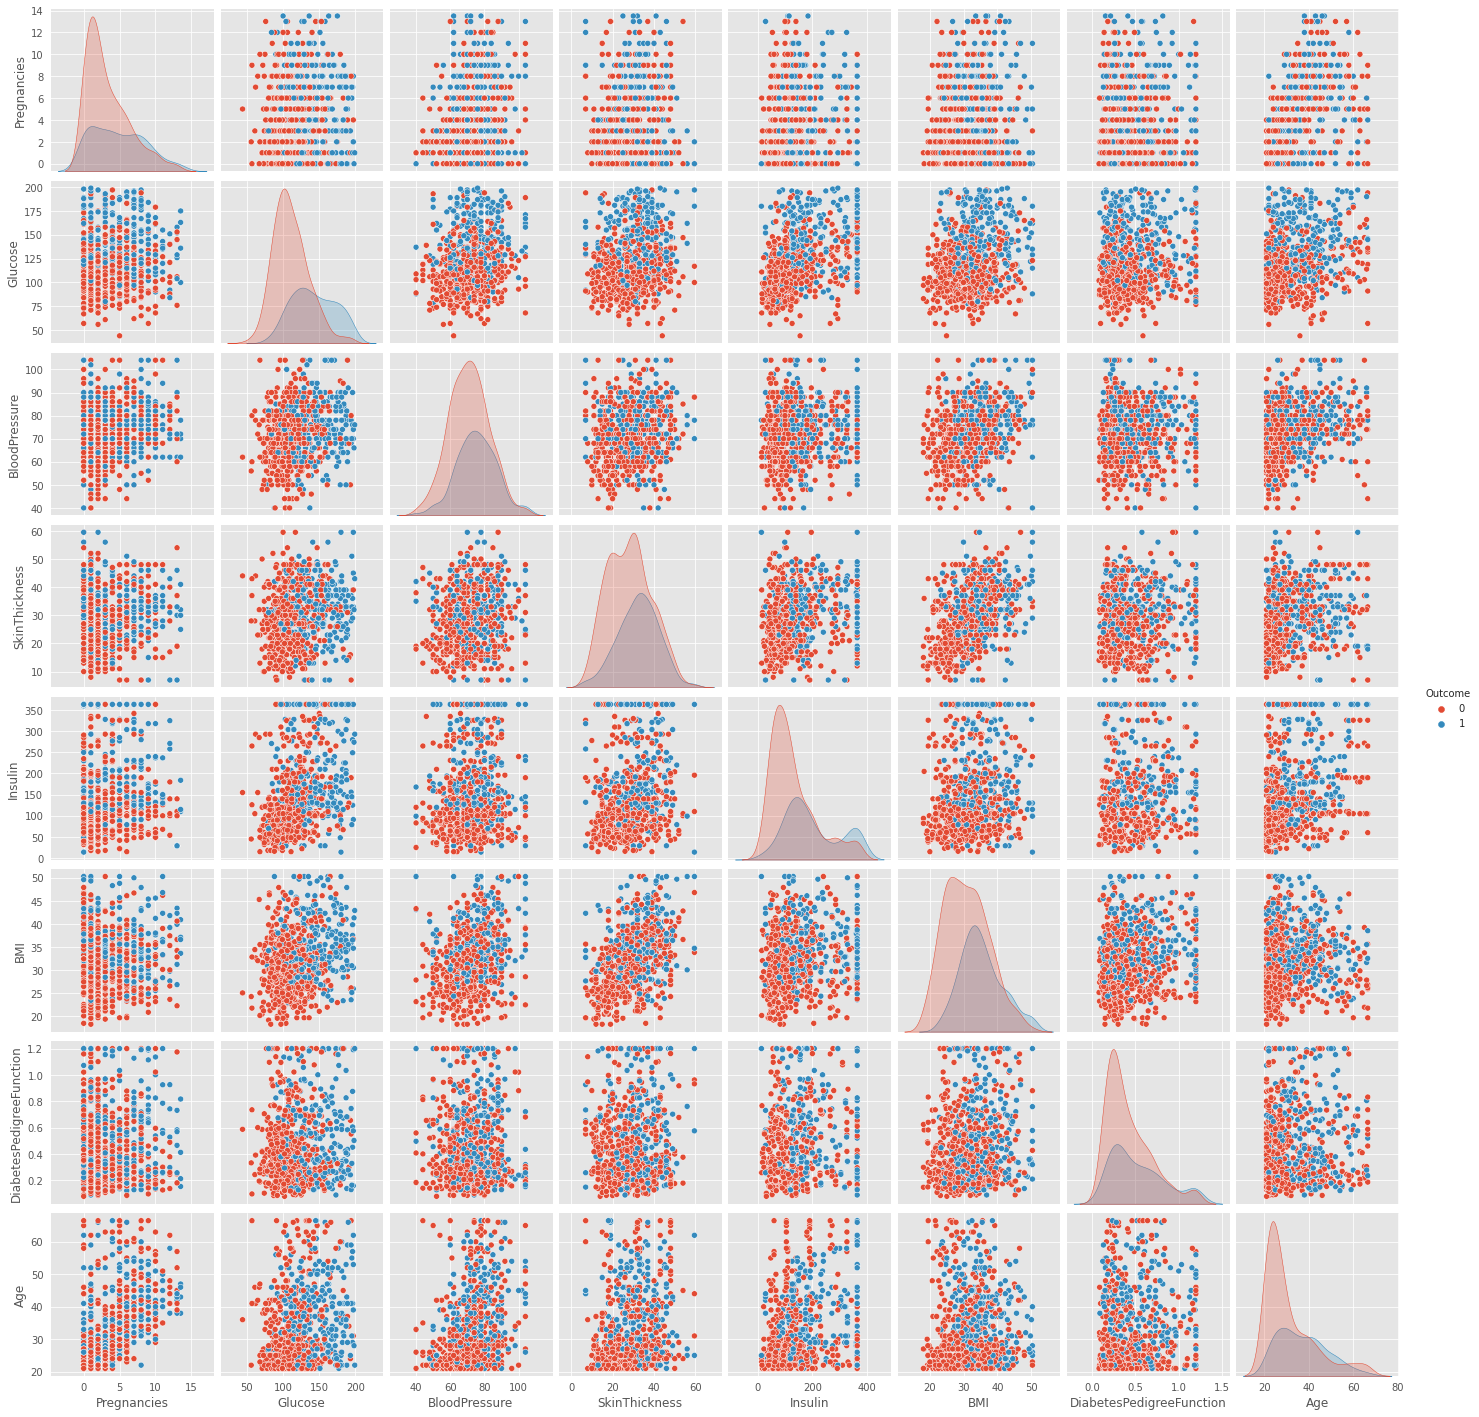

In [28]:
plt.figure()
sns.pairplot(df, hue= "Outcome")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

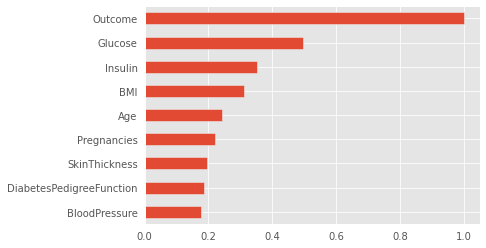

In [30]:
df.corr()['Outcome'].apply(lambda x: abs(x)).sort_values().plot.barh()
plt.show

<AxesSubplot:>

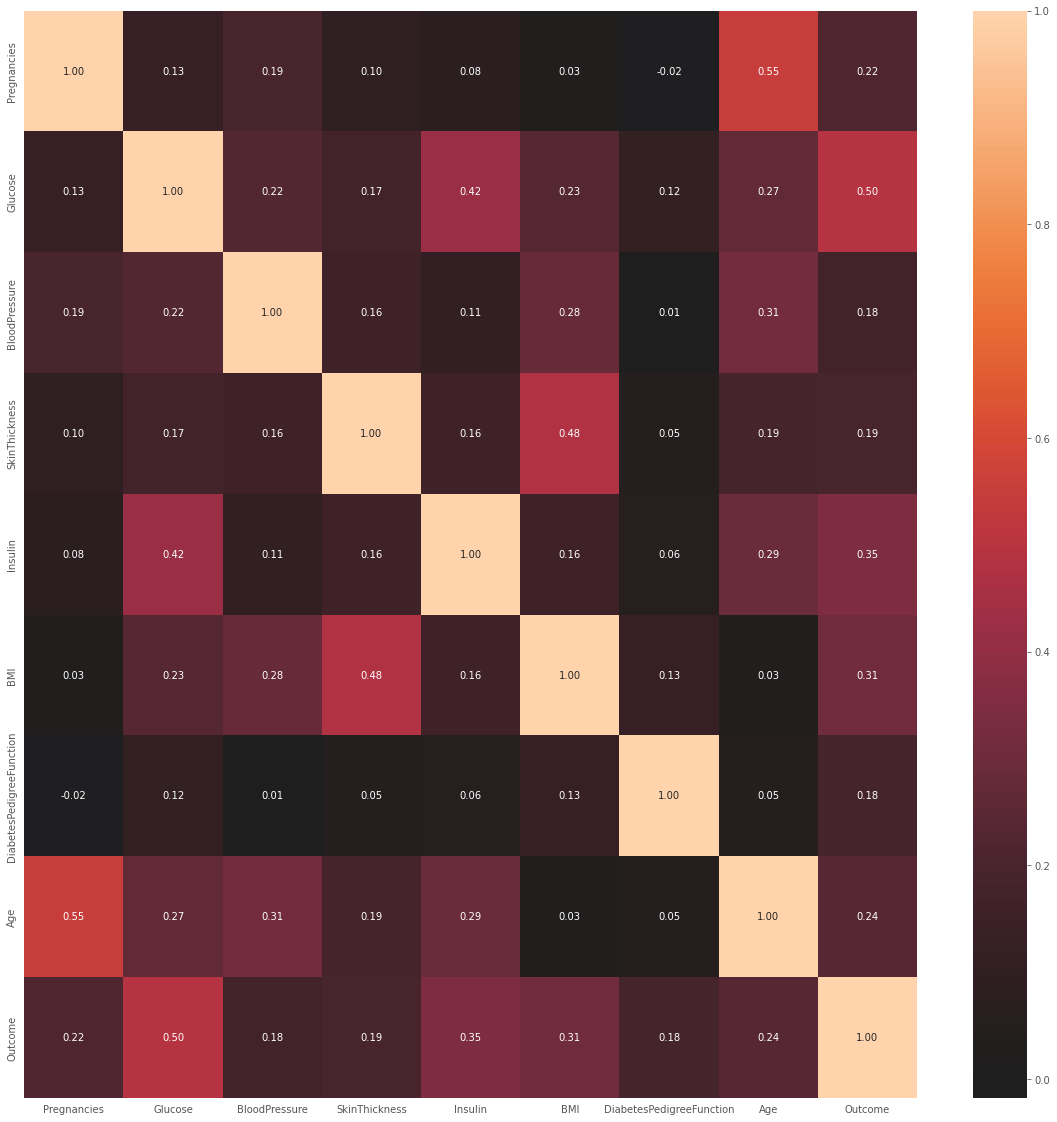

In [31]:
plt.figure(figsize=(20,20))  
sns.heatmap(df.corr(),fmt='.2f',annot=True, center=0)

In [ ]:
X = df.drop(['y'], axis=1)
y = df['y']

In [ ]:
# Applying SMOTE technique
sm = SMOTE(random_state=2)
X_s, y_s = sm.fit_resample(X, y)

print('Train shape before oversampling:', X.shape) 
print('Class balance before oversampling: \n', y.value_counts(), sep='')
print('-'*40)
print('Train shape after oversampling:', X_s.shape)
print('Class balance after oversampling: \n', y_s.value_counts(), sep='')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_s, y_s, stratify=y_s, random_state = 42, test_size = 0.33
)

In [ ]:
#normalization
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns= X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
dt_clf_full = tree.DecisionTreeClassifier(
    criterion='gini', 
    max_depth=6, 
    random_state=42 
)

dt_clf_full.fit(X_train_scaled, y_train)

y_pred_train = dt_clf_full.predict(X_train_scaled)
y_pred_test = dt_clf_full.predict(X_test_scaled)
print('Train df:',metrics.classification_report(y_train, y_pred_train))
print('Test df:',metrics.classification_report(y_test, y_pred_test))

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
feature = X_train_scaled.columns
feature_importances = dt_clf_full.feature_importances_

sorted_indices = np.argsort(feature_importances)[::-1]

sns.barplot(x=feature[sorted_indices], y=feature_importances[sorted_indices], ax=ax)

ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances')
ax.set_xticklabels(feature[sorted_indices], rotation=45)  # Specify rotation angle

plt.tight_layout()
plt.show()

In [ ]:
# Optuna optimization
import optuna
random_state = 42
def optuna_rf(trial):
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=random_state)
  model.fit(X_train_scaled, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train_scaled))

  return score

study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
study.optimize(optuna_rf, n_trials=20)

print("The best hyperparameters {}".format(study.best_params))
print("f1_score for train sample: {:.2f}".format(study.best_value))


In [ ]:
# metrics for valid sample
model = ensemble.RandomForestClassifier(**study.best_params,random_state=random_state, )
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
y_valid_pred = model.predict(X_valid_scaled)

print(classification_report(y_train, y_pred_stack_train))
print(metrics.classification_report(y_valid, y_valid_pred))